In [117]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import Entrez
from scipy.cluster.hierarchy import dendrogram, linkage
import subprocess
import multiprocessing
import plotly.express as px
import glob

In [242]:
files = glob.glob('DATA/bats/ictv_coverage/*')

In [286]:
def per_fragments_sum_coverage(x, y):
    return [[round(i_x + i_y, 2) for i_x, i_y in zip(el_x, el_y)] for el_x, el_y in zip(x, y)]

def mean_per_fragments_coverage(x, n):
    return [int(round(i/n, 2) * 100) for i in x]

In [287]:
common_file = pd.read_csv(files[0], converters={'fragments_coverage': pd.eval}).sort_values(by='Species')
for i in files[1:]:
    file = pd.read_csv(i, converters={'fragments_coverage': pd.eval}).sort_values(by='Species')
    common_file.coverage = np.array(common_file.coverage) + np.array(file.coverage)
    common_file.fragments_coverage = per_fragments_sum_coverage(common_file.fragments_coverage.values.tolist(),
                                                           file.fragments_coverage.values.tolist())
common_file.coverage = ((common_file.coverage/len(files)).apply(lambda x: round(x, 2)) * 100).astype('int')
common_file.fragments_coverage = common_file.fragments_coverage.apply(lambda x: mean_per_fragments_coverage(x, len(files)))

In [288]:
common_file = common_file.sort_values(by='coverage', ascending=False)

In [289]:
common_file.reset_index(drop=True).to_csv('DATA/bats/result_coverage_table.tsv', sep='\t')

<Axes: xlabel='coverage', ylabel='Virus name(s)'>

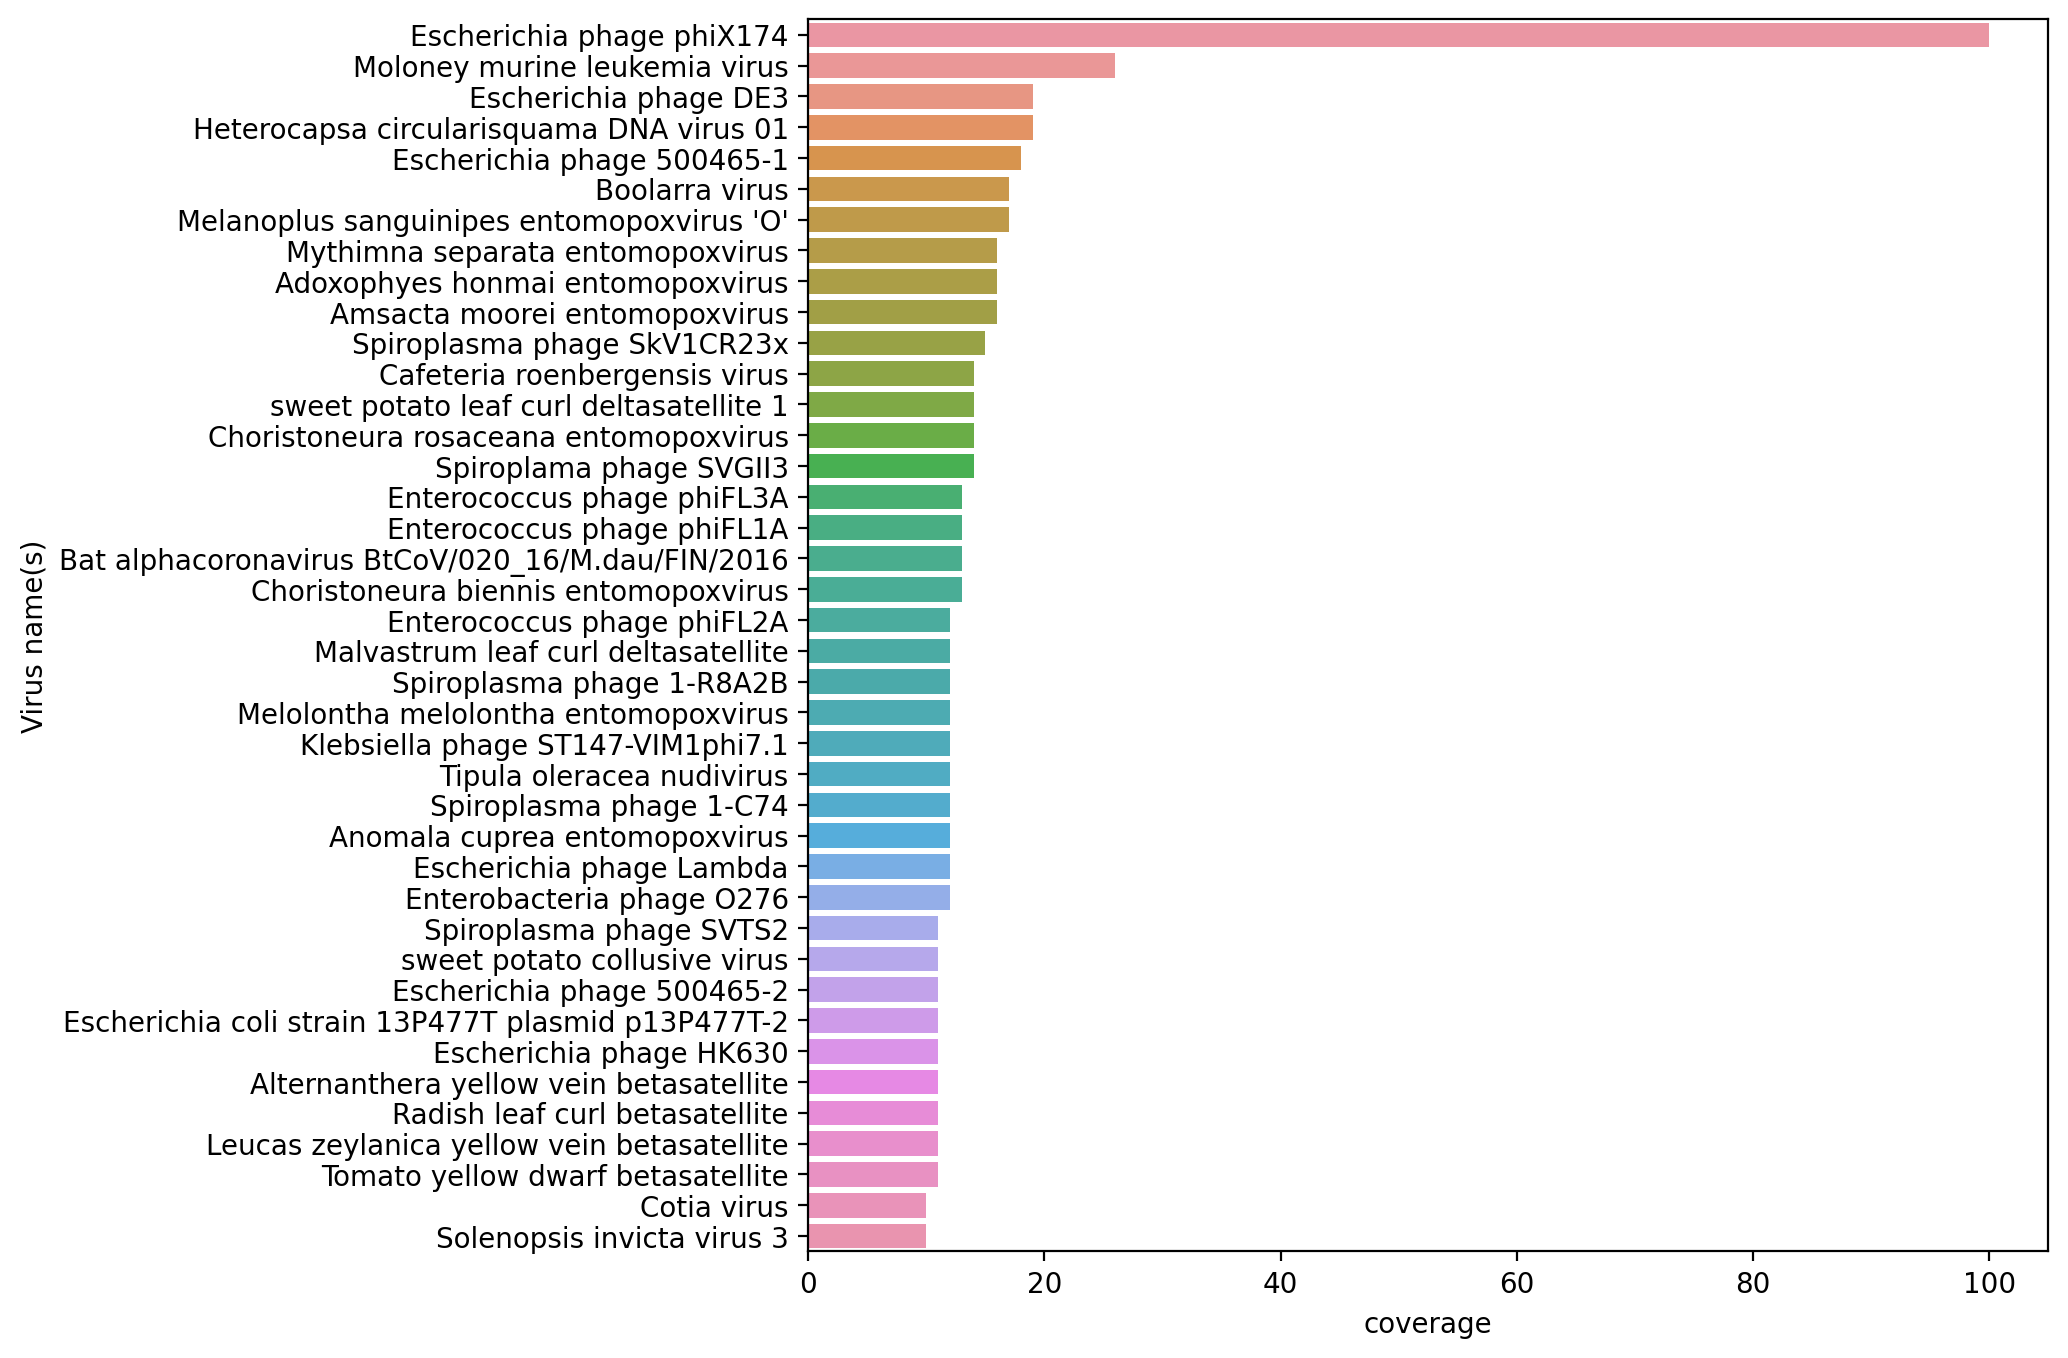

In [292]:
plt.figure(figsize=(8, 8), facecolor='white', dpi=200)
sns.barplot(x=common_file.coverage[:40], y=common_file['Virus name(s)'][:40])